# 1. Introduction

#### What is ENEM?

Exame Nacional do Ensino Médio; English: National High School Exam), shortened as Enem is a non-mandatory, standardized
Brazilian national exam, which evaluates high school students in Brazil. The ENEM is the most important exam of its kind 
in Brazil, with more than 8.6 million registered candidates in 2016. It is the second largest in the world after China's 
National Higher Education Entrance Examination.

Since 2009, the exam has been composed of 180 multiple-choice questions, equally divided into four areas of knowledge:
languages, codes and related technologies (plus a written essay); human sciences and related technologies; natural 
sciences and related technologies; and mathematics and its technologies. 
    
Source: https://en.wikipedia.org/wiki/Exame_Nacional_do_Ensino_Médio
    
#### What is this project?

This is an exploratory data analysis based on the results of the ENEM exam of 2019. The dataset is public and provided by 
the Brazillian Government.
    
Dataset: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem   


# 2. Lib Imports

In [1]:
from platform import python_version

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

# 3. Versions

In [2]:
print("Currently using python " + python_version())

print("Currently using pandas " + pd.__version__)

print("Currently using seaborn " + sns.__version__)

Currently using python 3.8.8
Currently using pandas 1.2.4
Currently using seaborn 0.11.1


# 4. Data Import

In [3]:
# Dataset: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

raw_data = pd.read_csv('MICRODADOS_ENEM_2019.csv', sep = ';', encoding = 'windows-1252')

# 5. Data Transforming

## 5.1 Filtering

In [4]:
# Filtering: filtering the columns that will be used further on the project.

dataset = raw_data.filter(items=['NO_MUNICIPIO_RESIDENCIA', 
                                 'SG_UF_RESIDENCIA', 
                                 'NU_IDADE', 
                                 'TP_SEXO', 
                                 'TP_ESCOLA', 
                                 'NU_NOTA_CN', 
                                 'NU_NOTA_CH', 
                                 'NU_NOTA_LC', 
                                 'NU_NOTA_MT', 
                                 'TX_RESPOSTAS_CN', 
                                 'TX_RESPOSTAS_CH', 
                                 'TX_RESPOSTAS_LC', 
                                 'TX_RESPOSTAS_MT', 
                                 'TX_GABARITO_CN', 
                                 'TX_GABARITO_CH', 
                                 'TX_GABARITO_LC', 
                                 'TX_GABARITO_MT', 
                                 'NU_NOTA_REDACAO', 
                                 'Q006', 
                                 'Q024', 
                                 'Q025'])

## 5.2 Renaming

In [5]:
# Renaming: translating the column names to English.

rename = {'NO_MUNICIPIO_RESIDENCIA': 'City', 
          'SG_UF_RESIDENCIA': 'State', 
          'NU_IDADE': 'Age', 
          'TP_SEXO': 'Gender', 
          'TP_ESCOLA': 'School_Type',
          'NU_NOTA_CN': 'Score_CN', 
          'NU_NOTA_CH': 'Score_CH',
          'NU_NOTA_LC': 'Score_LC',
          'NU_NOTA_MT': 'Score_MT',
          'TX_RESPOSTAS_CN': 'Answers_CN',
          'TX_RESPOSTAS_CH': 'Answers_CH',
          'TX_RESPOSTAS_LC': 'Answers_LC',
          'TX_RESPOSTAS_MT': 'Answers_MT',
          'TX_GABARITO_CN': 'Template_CN',
          'TX_GABARITO_CH': 'Template_CH',
          'TX_GABARITO_LC': 'Template_LC',
          'TX_GABARITO_MT': 'Template_MT',
          'NU_NOTA_REDACAO': 'Score_Essay',
          'Q006': 'Family_Income',
          'Q024': 'Computers',
          'Q025': 'Internet_Access'
}

dataset.rename(columns = rename, inplace = True)

## 5.3 Adding "Right_Answers" Variable

In this section all of the "Right_Answers_XX" variables will be created. The process of creating this variable consists on comparing the answers on the "Answers_XX" variable with the templates on the "Templates_XX".
    
The process must be done for each of the multiple-choice tests:
    
    CN: Natural Sciences
    CH: Human Sciences
    LC: Languages and Codes
    MT: Math
    
Once the process is completed, the dataset will be updated with 5 new variables:
    
    Right_Answers_CN = Number of right answers on the CN test.
    Right_Answers_CH = Number of right answers on the CH test.
    Right_Answers_LC = Number of right answers on the LC test.
    Right_Answers_MT = Number of right answers on the MT test.
    Total_Right_Answers = Sum of all right answers.

Furthermore, the original "Answers_XX" and "Templates_XX" variables will be removed from the dataset. 

### 5.3.1 Right_Answers_CN

In [6]:
dataset['Answers_Template_CN'] = dataset['Answers_CN'] + "$" + dataset['Template_CN']

Right_Answers_CN = []

for item in dataset['Answers_Template_CN']:
    temp = str(item).split(sep='$') 

    if temp[0] == 'nan':
        Right_Answers_CN.append(None)        
    else:
        A = temp[0]
        T = temp[1]        
        P = 0
        i = 0
        f = len(A) - 1

        while i <= f:
            if A[i] == T[i]:
                i += 1
                P += 1
            else:
                i += 1 
            
        Right_Answers_CN.append(P)

Right_Answers_CN = pd.DataFrame(Right_Answers_CN)
Right_Answers_CN.rename(columns = {0: 'Right_Answers_CN'}, inplace = True)
dataset = dataset.join(Right_Answers_CN)
pd.to_numeric(dataset['Right_Answers_CN'])

dataset.pop('Answers_Template_CN')
dataset.pop('Answers_CN')
dataset.pop('Template_CN')

0                                                    NaN
1                                                    NaN
2                                                    NaN
3          BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB
4          BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB
                               ...                      
5095265                                              NaN
5095266                                              NaN
5095267                                              NaN
5095268                                              NaN
5095269                                              NaN
Name: Template_CN, Length: 5095270, dtype: object

### 5.3.2 Right_Answers_CH

In [7]:
dataset['Answers_Template_CH'] = dataset['Answers_CH'] + "$" + dataset['Template_CH']

Right_Answers_CH = []

for item in dataset['Answers_Template_CH']:
    temp = str(item).split(sep='$') 

    if temp[0] == 'nan':
        Right_Answers_CH.append(None)        
    else:
        A = temp[0]
        T = temp[1]        
        P = 0
        i = 0
        f = len(A) - 1

        while i <= f:
            if A[i] == T[i]:
                i += 1
                P += 1
            else:
                i += 1 
            
        Right_Answers_CH.append(P)

Right_Answers_CH = pd.DataFrame(Right_Answers_CH)
Right_Answers_CH.rename(columns = {0: 'Right_Answers_CH'}, inplace = True)
dataset = dataset.join(Right_Answers_CH)
pd.to_numeric(dataset['Right_Answers_CH'])

dataset.pop('Answers_Template_CH')
dataset.pop('Answers_CH')
dataset.pop('Template_CH')

0                                                    NaN
1                                                    NaN
2                                                    NaN
3          EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB
4          EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB
                               ...                      
5095265                                              NaN
5095266    ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB
5095267                                              NaN
5095268                                              NaN
5095269                                              NaN
Name: Template_CH, Length: 5095270, dtype: object

### 5.3.3 Right_Answers_LC

In [8]:
dataset['Answers_Template_LC'] = dataset['Answers_LC'] + "$" + dataset['Template_LC']

Right_Answers_LC = []

for item in dataset['Answers_Template_LC']:
    temp = str(item).split(sep='$') 

    if temp[0] == 'nan':
        Right_Answers_LC.append(None)        
    else:
        A = temp[0]
        T = temp[1]        
        P = 0
        i = 0
        f = len(A) - 1

        while i <= f:
            if A[i] == T[i]:
                i += 1
                P += 1
            else:
                i += 1 
            
        Right_Answers_LC.append(P)

Right_Answers_LC = pd.DataFrame(Right_Answers_LC)
Right_Answers_LC.rename(columns = {0: 'Right_Answers_LC'}, inplace = True)
dataset = dataset.join(Right_Answers_LC)
pd.to_numeric(dataset['Right_Answers_LC'])

dataset.pop('Answers_Template_LC')
dataset.pop('Answers_LC')
dataset.pop('Template_LC')

0                                                        NaN
1                                                        NaN
2                                                        NaN
3          ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...
4          ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...
                                 ...                        
5095265                                                  NaN
5095266    EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...
5095267                                                  NaN
5095268                                                  NaN
5095269                                                  NaN
Name: Template_LC, Length: 5095270, dtype: object

### 5.3.4 Right_Answers_MT

In [9]:
dataset['Answers_Template_MT'] = dataset['Answers_MT'] + "$" + dataset['Template_MT']

Right_Answers_MT = []

for item in dataset['Answers_Template_MT']:
    temp = str(item).split(sep='$') 

    if temp[0] == 'nan':
        Right_Answers_MT.append(None)        
    else:
        A = temp[0]
        T = temp[1]        
        P = 0
        i = 0
        f = len(A) - 1

        while i <= f:
            if A[i] == T[i]:
                i += 1
                P += 1
            else:
                i += 1 
            
        Right_Answers_MT.append(P)

Right_Answers_MT = pd.DataFrame(Right_Answers_MT)
Right_Answers_MT.rename(columns = {0: 'Right_Answers_MT'}, inplace = True)
dataset = dataset.join(Right_Answers_MT)
pd.to_numeric(dataset['Right_Answers_MT'])

dataset.pop('Answers_Template_MT')
dataset.pop('Answers_MT')
dataset.pop('Template_MT')

0                                                    NaN
1                                                    NaN
2                                                    NaN
3          BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD
4          BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD
                               ...                      
5095265                                              NaN
5095266                                              NaN
5095267                                              NaN
5095268                                              NaN
5095269                                              NaN
Name: Template_MT, Length: 5095270, dtype: object

### 5.3.5 Total_Right_Answers

In [10]:
dataset['Total_Right_Answers'] = dataset['Right_Answers_CN'] + dataset['Right_Answers_CH'] + dataset['Right_Answers_LC'] + dataset['Right_Answers_MT']

## 5.4 Replacing "Family_Income" Variable

In [11]:
# Replacing the categorical values of the "Family_Income" variable for the numerical values. 
# This values represent the monthly family income in BRL (Brazillian currency).
# This information can be found on the official dataset documentation.

replace = {
    'A': 0,
    'B': 998,
    'C': 1497,    
    'D': 1996,
    'E': 2495,
    'F': 2994,
    'G': 3992,
    'H': 4990,
    'I': 5988,
    'J': 6986,
    'K': 7984,
    'L': 8982,    
    'M': 9980,
    'N': 11976,
    'O': 14970,
    'P': 19960,
    'Q': 20000 
}

dataset['Family_Income'].replace(replace, inplace = True)
pd.to_numeric(dataset['Family_Income'])

0             0
1          1497
2           998
3          2495
4          3992
           ... 
5095265    1497
5095266    1497
5095267    1497
5095268       0
5095269    1497
Name: Family_Income, Length: 5095270, dtype: int64

## 5.5 Replacing "Computers" Variable

In [12]:
# Replacing the categorical values of the "Computers" variable for the numerical values. 
# This values represent the amount of computers that the candidate has at home.
# This information can be found on the official dataset documentation.

replace = {
    'A': '0',
    'B': '1',
    'C': '2',    
    'D': '3',
    'E': '4',
}

dataset['Computers'].replace(replace, inplace = True)

## 5.6 Replacing "School_Type" Variable

In [13]:
# Replacing the numerical values of the "School_Type" variable for the categorical values. 
# This values represent the type of high school in which the candidate studied.
# This information can be found on the official dataset documentation.

replace = {
    1: 'Unknown',
    2: 'Public',    
    3: 'Private',
    4: 'Foreign',
}

dataset['School_Type'].replace(replace, inplace = True)

## 5.7 Replacing "Internet_Access" Variable

In [14]:
# Replacing the categorical values of the "Internet_Access" variable for the yes/no values. 
# This values represent if the candidate has internet access at home.
# This information can be found on the official dataset documentation.

replace = {
    'A': 'No',
    'B': 'Yes',
}

dataset['Internet_Access'].replace(replace, inplace = True)

## 5.8 Final Dataset Preview

In [15]:
# Final version of the dataset after all the transformations. This will be de main dataset for the Analysis section.

dataset

,City,State,Age,Gender,School_Type,Score_CN,Score_CH,Score_LC,Score_MT,Score_Essay,Family_Income,Computers,Internet_Access,Right_Answers_CN,Right_Answers_CH,Right_Answers_LC,Right_Answers_MT,Total_Right_Answers
0,Sorocaba,SP,36.0,M,Unknown,NaN,NaN,NaN,NaN,NaN,0,2,Yes,NaN,NaN,NaN,NaN,NaN
1,Feira de Santana,BA,23.0,M,Unknown,NaN,NaN,NaN,NaN,NaN,1497,0,Yes,NaN,NaN,NaN,NaN,NaN
2,Fortaleza,CE,39.0,F,Unknown,NaN,NaN,NaN,NaN,NaN,998,0,Yes,NaN,NaN,NaN,NaN,NaN
3,Palmas,TO,25.0,F,Unknown,483.8,503.6,537.3,392.0,460.0,2495,1,Yes,12.0,13.0,18.0,6.0,49.0
4,Contagem,MG,22.0,F,Unknown,513.6,575.5,570.7,677.0,860.0,3992,1,Yes,13.0,22.0,24.0,18.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095265,Brasília,DF,41.0,F,Unknown,NaN,NaN,NaN,NaN,NaN,1497,0,Yes,NaN,NaN,NaN,NaN,NaN
5095266,Manaus,AM,20.0,M,Unknown,NaN,578.9,555.5,NaN,500.0,1497,0,Yes,NaN,24.0,22.0,NaN,NaN
5095267,Bento Gonçalves,RS,21.0,M,Unknown,NaN,NaN,NaN,NaN,NaN,1497,1,Yes,NaN,NaN,NaN,NaN,NaN
5095268,Bento Gonçalves,RS,22.0,M,Unknown,NaN,NaN,NaN,NaN,NaN,0,0,Yes,NaN,NaN,NaN,NaN,NaN


# 6. Analysis

This is the Analysis section, in which we'll explore the already transformed dataset. This section is divided in two main subsections:

* Region Analysis = analysing the scores by state and city.
* Social Analysis = analysing the scores by age, family income, gender, school type, internet access and amount of computers.

## 6.1 Region Analysis

In this section we'll cover the average score and the number of candidates by state and by city, for each of the multiple-choice tests.
    
The visualization method will be a simple DataFrame preview. On the city analysis only the top 10 will be shown, sorted by average score.

### 6.1.1 Score by State (Natural Sciences Test)

In [16]:
dataset_CN = dataset.filter(items=['State', 'Score_CN'])

mean_CN = dataset_CN.groupby('State').mean().sort_values(by='Score_CN', ascending=False).round(2)
count_CN = dataset_CN.groupby('State').count().sort_values(by='Score_CN', ascending=False)
result_CN = mean_CN.join(count_CN, lsuffix='_mean_CN', rsuffix='_count_CN')
result_CN.rename(columns = {'Score_CN_mean_CN': 'Average_Score', 'Score_CN_count_CN': 'Candidates'}, inplace = True)

result_CN 

,Average_Score,Candidates
State,,
SP,497.00,582605
SC,493.06,79268
DF,492.79,66902
PR,492.35,150672
MG,492.33,393872
RJ,491.89,244924
ES,488.97,72532
RS,486.50,156284
GO,478.26,123952


### 6.1.2 Top 10 Cities (Natural Sciences Test)

In [17]:
dataset_CN = dataset.filter(items=['City', 'Score_CN'])

mean_CN = dataset_CN.groupby('City').mean().sort_values(by='Score_CN', ascending=False).round(2)
count_CN = dataset_CN.groupby('City').count().sort_values(by='Score_CN', ascending=False)
result_CN = mean_CN.join(count_CN, lsuffix='_mean_CN', rsuffix='_count_CN')
result_CN.rename(columns = {'Score_CN_mean_CN': 'Average_Score', 'Score_CN_count_CN': 'Candidates'}, inplace = True)

result_CN.head(10)

,Average_Score,Candidates
City,,
Trabiju,549.93,12
Westfália,548.05,10
Alto Bela Vista,539.51,22
Botucatu,531.15,1819
Valinhos,530.52,1726
São Caetano do Sul,529.28,2614
Nova Petrópolis,527.39,158
Dracena,526.98,482
Nova Guataporanga,524.77,15


### 6.1.3 Score by State (Human Sciences Test)

In [18]:
dataset_CH = dataset.filter(items=['State', 'Score_CH'])

mean_CH = dataset_CH.groupby('State').mean().sort_values(by='Score_CH', ascending=False).round(2)
count_CH = dataset_CH.groupby('State').count().sort_values(by='Score_CH', ascending=False)
result_CH = mean_CH.join(count_CH, lsuffix='_mean_CH', rsuffix='_count_CH')
result_CH.rename(columns = {'Score_CH_mean_CH': 'Average_Score', 'Score_CH_count_CH': 'Candidates'}, inplace = True)

result_CH 

,Average_Score,Candidates
State,,
SP,527.79,620645
SC,525.57,84695
PR,523.55,160907
RS,523.48,166727
RJ,523.36,259279
DF,523.13,71074
MG,520.84,414346
ES,517.65,76940
GO,505.84,131440


### 6.1.4 Top 10 Cities (Human Sciences Test)

In [19]:
dataset_CH = dataset.filter(items=['City', 'Score_CH'])

mean_CH = dataset_CH.groupby('City').mean().sort_values(by='Score_CH', ascending=False).round(2)
count_CH = dataset_CH.groupby('City').count().sort_values(by='Score_CH', ascending=False)
result_CH = mean_CH.join(count_CH, lsuffix='_mean_CH', rsuffix='_count_CH')
result_CH.rename(columns = {'Score_CH_mean_CH': 'Average_Score', 'Score_CH_count_CH': 'Candidates'}, inplace = True)

result_CH.head(10)

,Average_Score,Candidates
City,,
Westfália,589.16,10
São Caetano do Sul,559.65,2747
Iomerê,557.49,31
Valinhos,557.39,1807
Arroio do Meio,557.18,168
Roca Sales,555.26,74
Lajeado,554.58,815
Marques de Souza,553.48,16
Alto Bela Vista,553.24,22


### 6.1.5 Score by State (Languages and Codes Test)

In [20]:
dataset_LC = dataset.filter(items=['State', 'Score_LC'])

mean_LC = dataset_LC.groupby('State').mean().sort_values(by='Score_LC', ascending=False).round(2)
count_LC = dataset_LC.groupby('State').count().sort_values(by='Score_LC', ascending=False)
result_LC = mean_LC.join(count_LC, lsuffix='_mean_LC', rsuffix='_count_LC')
result_LC.rename(columns = {'Score_LC_mean_LC': 'Average_Score', 'Score_LC_count_LC': 'Candidates'}, inplace = True)

result_LC 

,Average_Score,Candidates
State,,
SP,539.90,620645
RJ,535.90,259279
DF,535.24,71074
SC,534.43,84695
RS,534.02,166727
PR,533.00,160907
MG,531.22,414346
ES,527.20,76940
GO,520.40,131440


### 6.1.6 Top 10 Cities (Languages and Codes Test)

In [21]:
dataset_LC = dataset.filter(items=['City', 'Score_LC'])

mean_LC = dataset_LC.groupby('City').mean().sort_values(by='Score_LC', ascending=False).round(2)
count_LC = dataset_LC.groupby('City').count().sort_values(by='Score_LC', ascending=False)
result_LC = mean_LC.join(count_LC, lsuffix='_mean_LC', rsuffix='_count_LC')
result_LC.rename(columns = {'Score_LC_mean_LC': 'Average_Score', 'Score_LC_count_LC': 'Candidates'}, inplace = True)

result_LC.head(10)

,Average_Score,Candidates
City,,
Westfália,579.68,10
São Caetano do Sul,563.91,2747
Lavrinhas,561.83,52
Valinhos,561.29,1807
Sério,556.72,6
Lajeado,556.41,815
Niterói,555.67,10955
Botucatu,555.67,1934
São José dos Campos,554.84,11778


### 6.1.7 Score by State (Math Test)

In [22]:
dataset_MT = dataset.filter(items=['State', 'Score_MT'])

mean_MT = dataset_MT.groupby('State').mean().sort_values(by='Score_MT', ascending=False).round(2)
count_MT = dataset_MT.groupby('State').count().sort_values(by='Score_MT', ascending=False)
result_MT = mean_MT.join(count_MT, lsuffix='_mean_MT', rsuffix='_count_MT')
result_MT.rename(columns = {'Score_MT_mean_MT': 'Average_Score', 'Score_MT_count_MT': 'Candidates'}, inplace = True)

result_MT 

,Average_Score,Candidates
State,,
SP,551.56,582605
SC,548.55,79268
MG,546.80,393872
ES,541.76,72532
PR,541.40,150672
RS,539.73,156284
RJ,539.56,244924
DF,536.79,66902
GO,523.39,123952


### 6.1.8 Top 10 Cities (Math Test)

In [23]:
dataset_MT = dataset.filter(items=['City', 'Score_MT'])

mean_MT = dataset_MT.groupby('City').mean().sort_values(by='Score_MT', ascending=False).round(2)
count_MT = dataset_MT.groupby('City').count().sort_values(by='Score_MT', ascending=False)
result_MT = mean_MT.join(count_MT, lsuffix='_mean_MT', rsuffix='_count_MT')
result_MT.rename(columns = {'Score_MT_mean_MT': 'Average_Score', 'Score_MT_count_MT': 'Candidates'}, inplace = True)

result_MT.head(10)

,Average_Score,Candidates
City,,
Westfália,693.61,10
São Caetano do Sul,611.13,2614
Itaúna,601.38,1376
Valinhos,600.84,1726
Lajeado,597.91,762
Montauri,597.61,22
Alto Bela Vista,597.30,22
Trabiju,596.43,12
Mato Leitão,595.44,50


### 6.1.9 Score by State (Essay)

In [24]:
dataset_ES = dataset.filter(items=['State', 'Score_Essay'])

mean_ES = dataset_ES.groupby('State').mean().sort_values(by='Score_Essay', ascending=False).round(2)
count_ES = dataset_ES.groupby('State').count().sort_values(by='Score_Essay', ascending=False)
result_ES = mean_ES.join(count_ES, lsuffix='_mean_ES', rsuffix='_count_ES')
result_ES.rename(columns = {'Score_Essay_mean_ES': 'Average_Score', 'Score_Essay_count_ES': 'Candidates'}, inplace = True)

result_ES

,Average_Score,Candidates
State,,
RJ,597.71,259279
MG,596.99,414346
SP,587.49,620645
SE,587.47,60399
ES,587.28,76940
DF,585.45,71074
SC,580.79,84695
RN,579.05,94564
RS,578.31,166727


### 6.1.10 Top 10 Cities (Essay)

In [25]:
dataset_ES = dataset.filter(items=['City', 'Score_Essay'])

mean_ES = dataset_ES.groupby('City').mean().sort_values(by='Score_Essay', ascending=False).round(2)
count_ES = dataset_ES.groupby('City').count().sort_values(by='Score_Essay', ascending=False)
result_ES = mean_ES.join(count_ES, lsuffix='_mean_ES', rsuffix='_count_ES')
result_ES.rename(columns = {'Score_Essay_mean_ES': 'Average_Score', 'Score_Essay_count_ES': 'Candidates'}, inplace = True)

result_ES.head(10)

,Average_Score,Candidates
City,,
Westfália,724.00,10
São Domingos do Sul,710.97,62
Cotiporã,681.14,35
Novais,680.61,33
Nova Friburgo,679.09,2717
Vila Flores,678.62,29
Veranópolis,676.76,346
Ajuricaba,675.31,98
Mato Leitão,672.45,53


## 6.2 Social Analysis

In this section we'll cover the relationship between the test score variables and the social variables.
    
The visualization method will be as following:
    
* Age Analysis = line plot showing the relationship between the candidate's age and the score (or number of right answers);
    
* Family Income Analysis = series of violin plots showing the relationship between the candidate's monthly family income and the score (or number of right answers).

* Gender Analysis = boxplot showing the relationship between the candidate's gender and the score (or number of right answers);

* School Type Analysis = series of boxplots showing the relationship between the candidate's school type and the score (or number of right answers);

* Internet Access and Computers = grouped boxplots showing the relationship between the amount of computers the candidate has at home (and if it has internet access) and the score (or number of right answers);    

### 6.2.1 Score by Age (Natural Sciences Test)

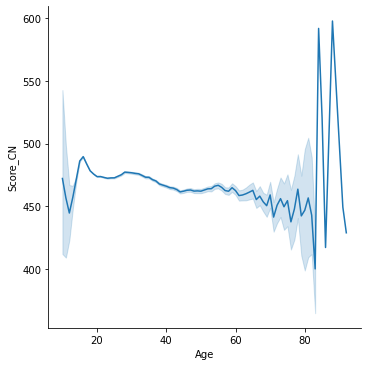

In [26]:
dataset_age_CN = dataset.filter(items=['Age', 'Score_CN'])
                                    
dataset_age_CN = dataset_age_CN.loc[(dataset_age_CN != 0).all(axis=1), :]

score_by_age_CN = sns.relplot(x = 'Age', y = 'Score_CN', kind = 'line', data = dataset_age_CN)

### 6.2.2 Score by Age (Human Sciences Test)

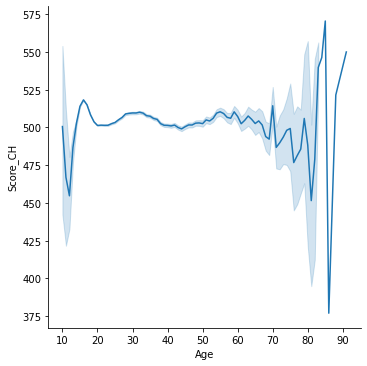

In [27]:
dataset_age_CH = dataset.filter(items=['Age', 'Score_CH'])
                                    
dataset_age_CH = dataset_age_CH.loc[(dataset_age_CH != 0).all(axis=1), :]

score_by_age_CH = sns.relplot(x = 'Age', y = 'Score_CH', kind = 'line', data = dataset_age_CH)

### 6.2.3 Score by Age (Languages and Codes Test)

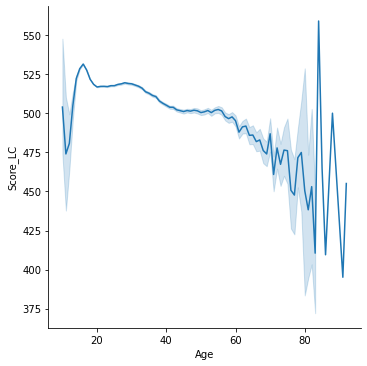

In [28]:
dataset_age_LC = dataset.filter(items=['Age', 'Score_LC'])
                                    
dataset_age_LC = dataset_age_LC.loc[(dataset_age_LC != 0).all(axis=1), :]

score_by_age_LC = sns.relplot(x = 'Age', y = 'Score_LC', kind = 'line', data = dataset_age_LC)

### 6.2.4 Score by Age (Math Test)

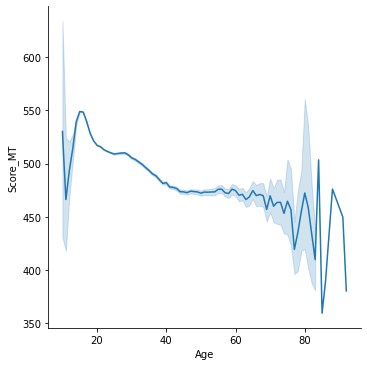

In [29]:
dataset_age_MT = dataset.filter(items=['Age', 'Score_MT'])
                                    
dataset_age_MT = dataset_age_MT.loc[(dataset_age_MT != 0).all(axis=1), :]

score_by_age_MT = sns.relplot(x = 'Age', y = 'Score_MT', kind = 'line', data = dataset_age_MT)

### 6.2.5 Score by Age (Essay)

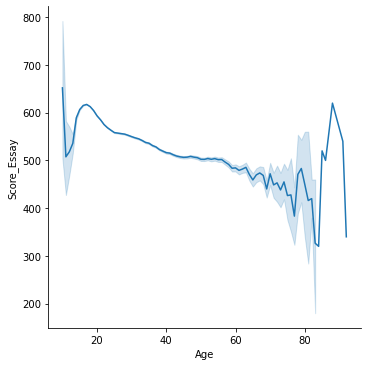

In [30]:
dataset_age_ES = dataset.filter(items=['Age', 'Score_Essay'])
                                    
dataset_age_ES = dataset_age_ES.loc[(dataset_age_ES != 0).all(axis=1), :]

score_by_age_ES = sns.relplot(x = 'Age', y = 'Score_Essay', kind = 'line', data = dataset_age_ES)

### 6.2.6 Total Right Answers by Age

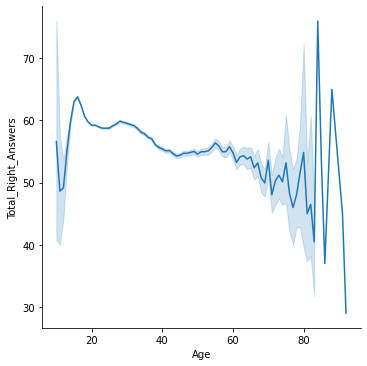

In [31]:
dataset_age_RA = dataset.filter(items=['Age', 'Total_Right_Answers'])
                                    
dataset_age_RA = dataset_age_RA.loc[(dataset_age_RA != 0).all(axis=1), :]

score_by_age_RA = sns.relplot(x = 'Age', y = 'Total_Right_Answers', kind = 'line', data = dataset_age_RA)

### 6.2.7 Score by Family Income (Natural Sciences)

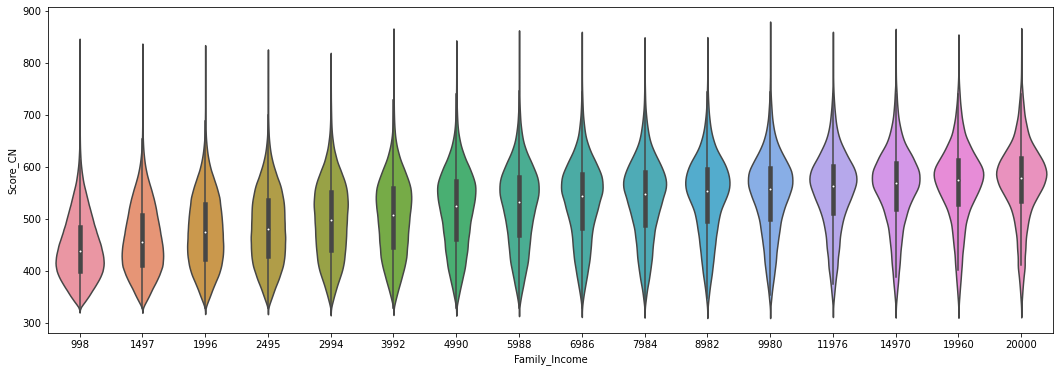

In [32]:
dataset_inc_CN = dataset.filter(items=['Family_Income', 'Score_CN'])
                                    
dataset_inc_CN = dataset_inc_CN.loc[(dataset_inc_CN != 0).all(axis=1), :]

fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_inc_CN = sns.violinplot(x = 'Family_Income', y = 'Score_CN', ax = ax, data = dataset_inc_CN)

### 6.2.8 Score by Family Income (Human Sciences)

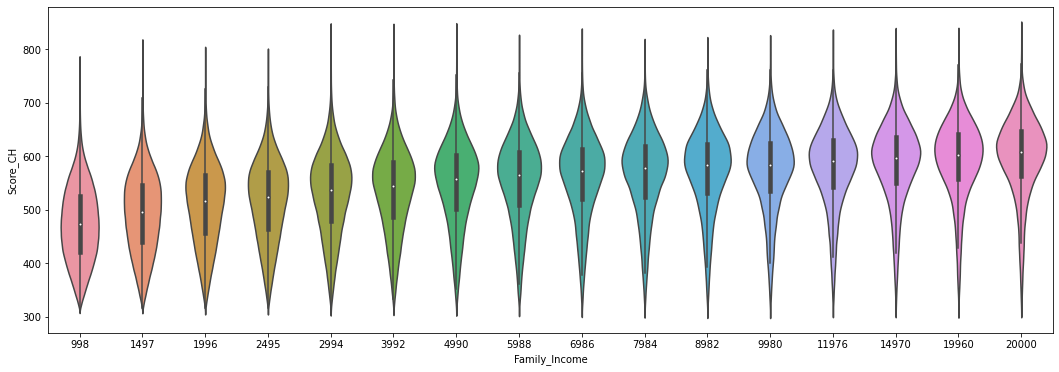

In [33]:
dataset_inc_CH = dataset.filter(items=['Family_Income', 'Score_CH'])
                                    
dataset_inc_CH = dataset_inc_CH.loc[(dataset_inc_CH != 0).all(axis=1), :]

fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_inc_CH = sns.violinplot(x = 'Family_Income', y = 'Score_CH', ax = ax, data = dataset_inc_CH)

### 6.2.9 Score by Family Income (Languages and Codes)

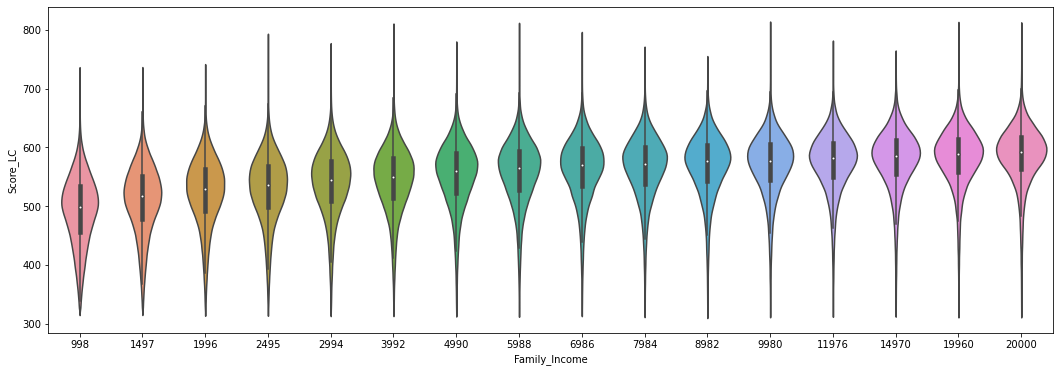

In [34]:
dataset_inc_LC = dataset.filter(items=['Family_Income', 'Score_LC'])
                                    
dataset_inc_LC = dataset_inc_LC.loc[(dataset_inc_LC != 0).all(axis=1), :]

fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_inc_LC = sns.violinplot(x = 'Family_Income', y = 'Score_LC', ax = ax, data = dataset_inc_LC)

### 6.2.10 Score by Family Income (Math)

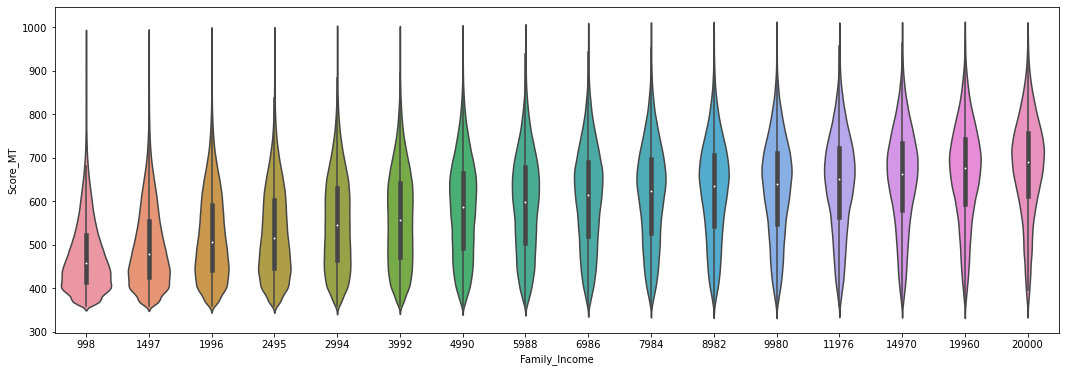

In [35]:
dataset_inc_MT = dataset.filter(items=['Family_Income', 'Score_MT'])
                                    
dataset_inc_MT = dataset_inc_MT.loc[(dataset_inc_MT != 0).all(axis=1), :]

fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_inc_MT = sns.violinplot(x = 'Family_Income', y = 'Score_MT', ax = ax, data = dataset_inc_MT)

### 6.2.11 Score by Family Income (Essay)

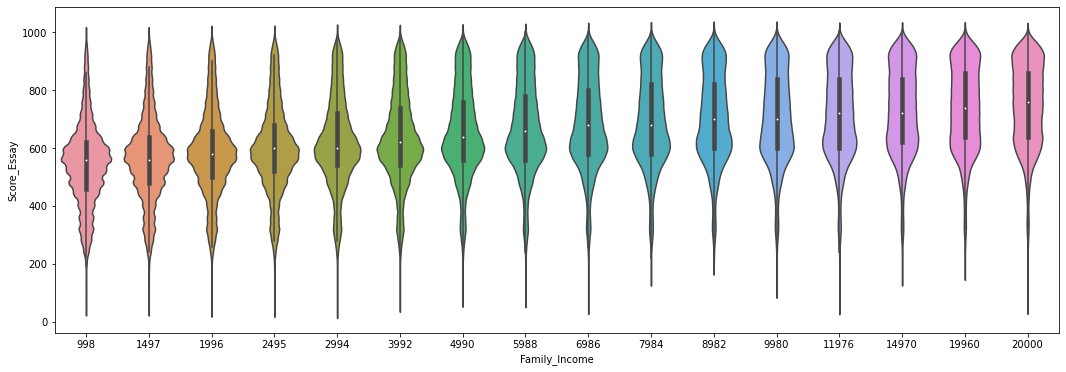

In [36]:
dataset_inc_ES = dataset.filter(items=['Family_Income', 'Score_Essay'])
                                    
dataset_inc_ES = dataset_inc_ES.loc[(dataset_inc_ES != 0).all(axis=1), :]

fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_inc_ES = sns.violinplot(x = 'Family_Income', y = 'Score_Essay', ax = ax, data = dataset_inc_ES)

### 6.2.12 Total Right Answers by Family Income

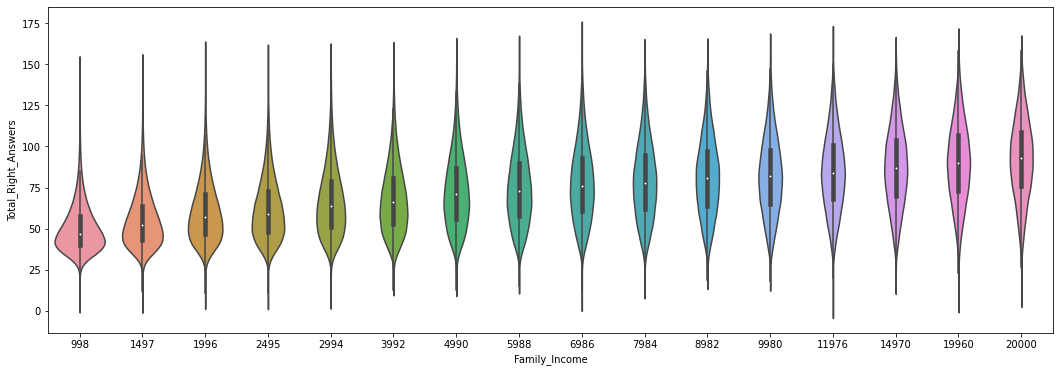

In [37]:
dataset_inc_RA = dataset.filter(items=['Family_Income', 'Total_Right_Answers'])
                                    
dataset_inc_RA = dataset_inc_RA.loc[(dataset_inc_RA != 0).all(axis=1), :]

fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_inc_RA = sns.violinplot(x = 'Family_Income', y = 'Total_Right_Answers', ax = ax, data = dataset_inc_RA)

### 6.2.13 Score by Gender (Natural Sciences)

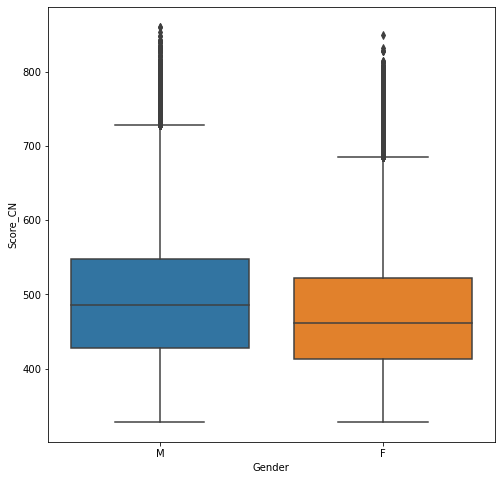

In [38]:
dataset_gen_CN = dataset.filter(items=['Gender', 'Score_CN'])
                                  
dataset_gen_CN = dataset_gen_CN.loc[(dataset_gen_CN != 0).all(axis=1), :]

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_gen_CN = sns.boxplot(x = 'Gender', y = 'Score_CN', ax = ax,  data = dataset_gen_CN)

### 6.2.14 Score by Gender (Human Sciences)

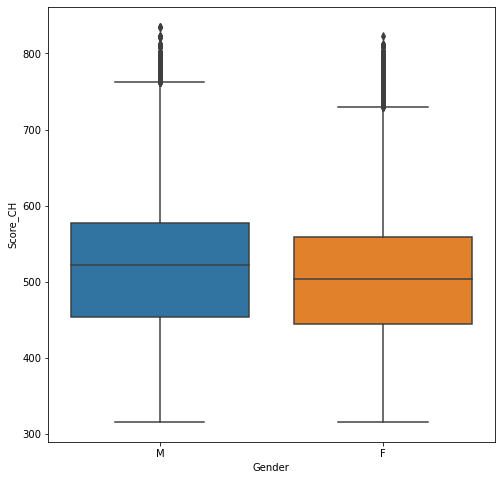

In [39]:
dataset_gen_CH = dataset.filter(items=['Gender', 'Score_CH'])
                                  
dataset_gen_CH = dataset_gen_CH.loc[(dataset_gen_CH != 0).all(axis=1), :]

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_gen_CH = sns.boxplot(x = 'Gender', y = 'Score_CH', ax = ax, data = dataset_gen_CH)

### 6.2.15 Score by Gender (Languages and Codes)

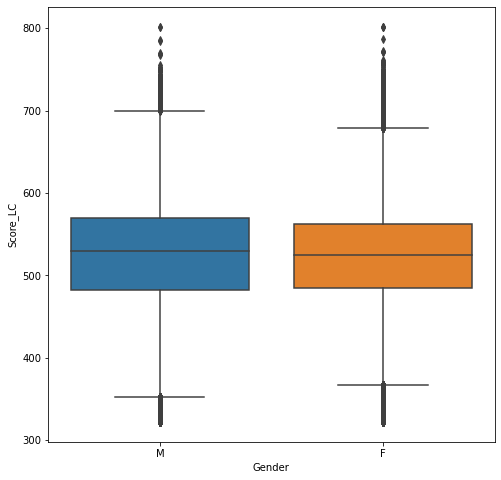

In [40]:
dataset_gen_LC = dataset.filter(items=['Gender', 'Score_LC'])
                                  
dataset_gen_LC = dataset_gen_LC.loc[(dataset_gen_LC != 0).all(axis=1), :]

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_gen_LC = sns.boxplot(x = 'Gender', y = 'Score_LC', ax = ax, data = dataset_gen_LC)

### 6.2.16 Score by Gender (Math)

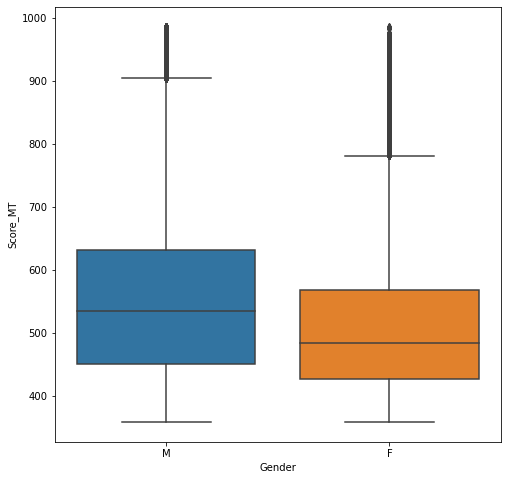

In [41]:
dataset_gen_MT = dataset.filter(items=['Gender', 'Score_MT'])
                                  
dataset_gen_MT = dataset_gen_MT.loc[(dataset_gen_MT != 0).all(axis=1), :]

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_gen_MT = sns.boxplot(x = 'Gender', y = 'Score_MT', ax = ax, data = dataset_gen_MT)

### 6.2.17 Score by Gender (Essay)

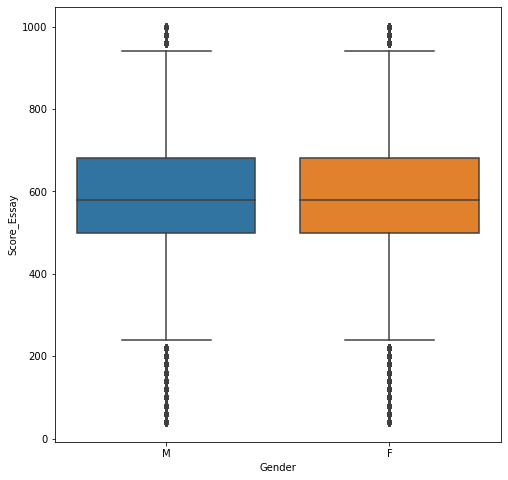

In [42]:
dataset_gen_ES = dataset.filter(items=['Gender', 'Score_Essay'])
                                  
dataset_gen_ES = dataset_gen_ES.loc[(dataset_gen_ES != 0).all(axis=1), :]

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_gen_ES = sns.boxplot(x = 'Gender', y = 'Score_Essay', ax = ax, data = dataset_gen_ES)

### 6.2.18 Total Right Answers by Gender

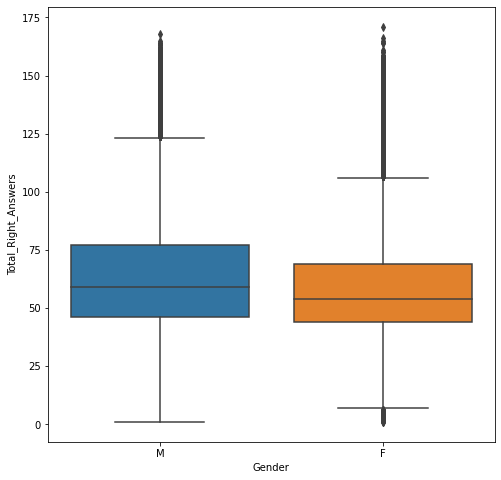

In [43]:
dataset_gen_RA = dataset.filter(items=['Gender', 'Total_Right_Answers'])
                                  
dataset_gen_RA = dataset_gen_RA.loc[(dataset_gen_RA != 0).all(axis=1), :]

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_gen_RA = sns.boxplot(x = 'Gender', y = 'Total_Right_Answers', ax = ax, data = dataset_gen_RA)

### 6.2.19 Score by School Type (Natural Sciences)

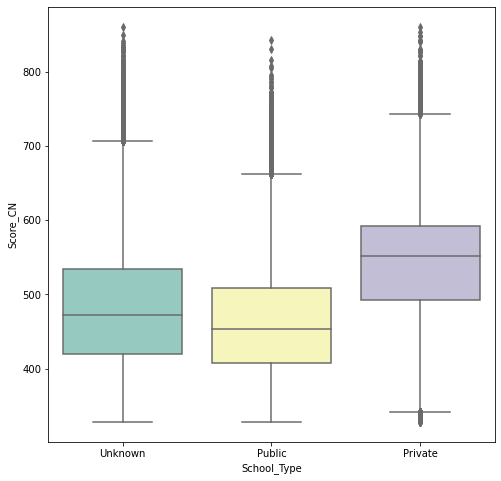

In [44]:
dataset_st_CN = dataset.filter(items=['School_Type', 'Score_CN'])
                                  
dataset_st_CN = dataset_st_CN.loc[(dataset_st_CN != 0).all(axis=1), :]

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_st_CN = sns.boxplot(x = 'School_Type', y = 'Score_CN', palette = 'Set3', ax = ax, data = dataset_st_CN)

### 6.2.20 Score by School Type (Human Sciences)

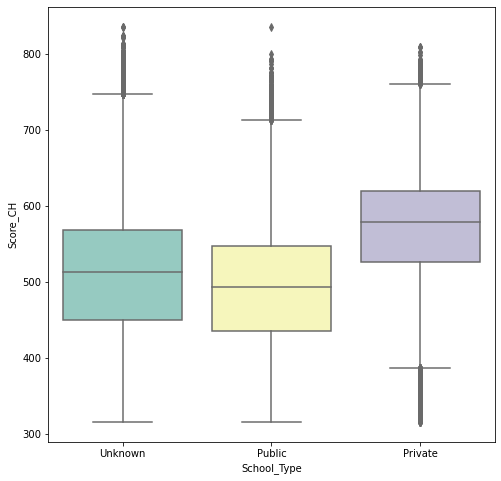

In [45]:
dataset_st_CH = dataset.filter(items=['School_Type', 'Score_CH'])
                                  
dataset_st_CH = dataset_st_CH.loc[(dataset_st_CH != 0).all(axis=1), :]

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_st_CH = sns.boxplot(x = 'School_Type', y = 'Score_CH', palette = 'Set3', ax = ax, data = dataset_st_CH)

### 6.2.21 Score by School Type (Languages and Codes)

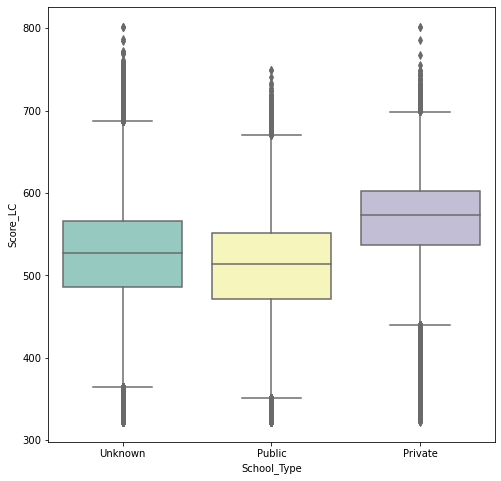

In [46]:
dataset_st_LC = dataset.filter(items=['School_Type', 'Score_LC'])
                                  
dataset_st_LC = dataset_st_LC.loc[(dataset_st_LC != 0).all(axis=1), :]

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_st_LC = sns.boxplot(x = 'School_Type', y = 'Score_LC', palette = 'Set3', ax = ax, data = dataset_st_LC)

### 6.2.22 Score by School Type (Math)

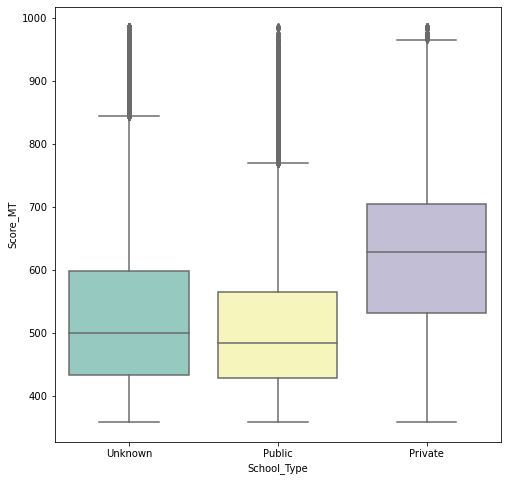

In [47]:
dataset_st_MT = dataset.filter(items=['School_Type', 'Score_MT'])
                                  
dataset_st_MT = dataset_st_MT.loc[(dataset_st_MT != 0).all(axis=1), :]

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_st_MT = sns.boxplot(x = 'School_Type', y = 'Score_MT', palette = 'Set3', ax = ax, data = dataset_st_MT)

### 6.2.23 Score by School Type (Essay)

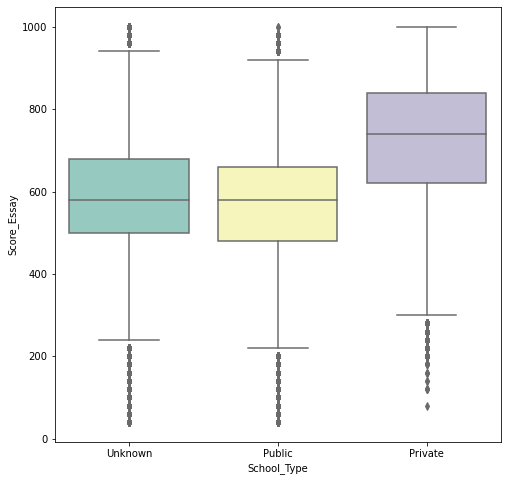

In [48]:
dataset_st_ES = dataset.filter(items=['School_Type', 'Score_Essay'])
                                  
dataset_st_ES = dataset_st_ES.loc[(dataset_st_ES != 0).all(axis=1), :]

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_st_ES = sns.boxplot(x = 'School_Type', y = 'Score_Essay', palette = 'Set3', ax = ax, data = dataset_st_ES)

### 6.2.24 Total Right Answers by School Type

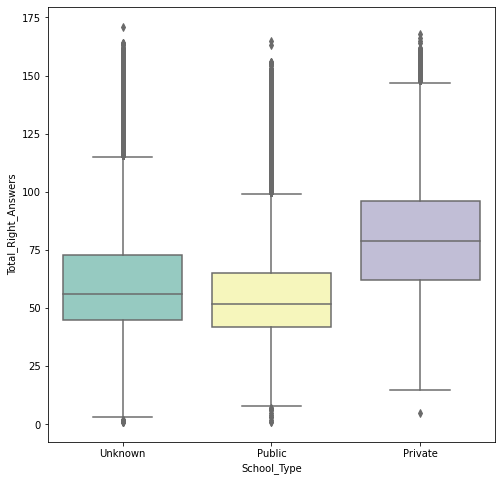

In [49]:
dataset_st_RA = dataset.filter(items=['School_Type', 'Total_Right_Answers'])
                                  
dataset_st_RA = dataset_st_RA.loc[(dataset_st_RA != 0).all(axis=1), :]

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_st_RA = sns.boxplot(x = 'School_Type', y = 'Total_Right_Answers', palette = 'Set3', ax = ax, data = dataset_st_RA)

### 6.2.25 Score by Internet Access and Computers (Natural Sciences)

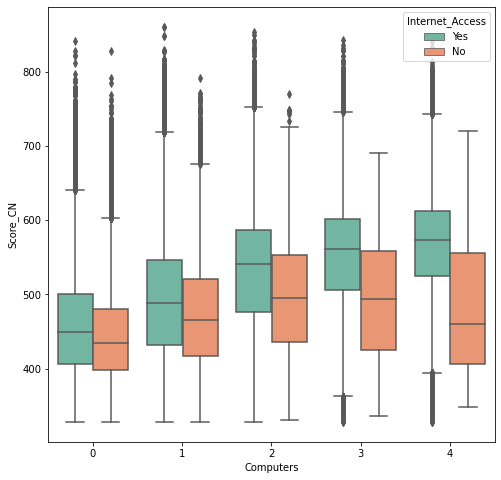

In [50]:
dataset_ic_CN = dataset.filter(items=['Internet_Access', 'Computers', 'Score_CN'])
                                  
dataset_ic_CN = dataset_ic_CN.loc[(dataset_ic_CN != 0).all(axis=1), :]

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_ic_CN = sns.boxplot(x = 'Computers', y = 'Score_CN', hue = 'Internet_Access',
                             palette = 'Set2', ax = ax, data = dataset_ic_CN,
                            order = ['0', '1', '2', '3', '4'])

### 6.2.26 Score by Internet Access and Computers (Human Sciences)

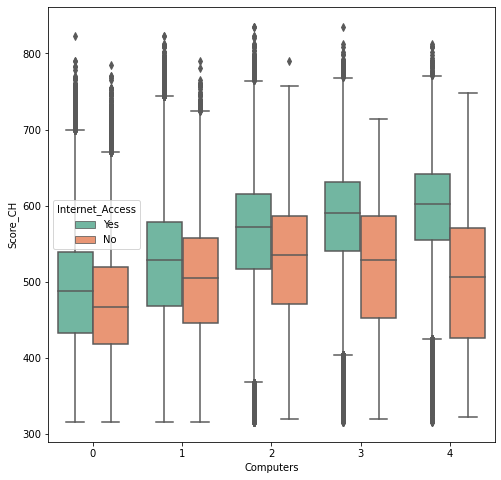

In [51]:
dataset_ic_CH = dataset.filter(items=['Internet_Access', 'Computers', 'Score_CH'])
                                  
dataset_ic_CH = dataset_ic_CH.loc[(dataset_ic_CH != 0).all(axis=1), :]

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_ic_CH = sns.boxplot(x = 'Computers', y = 'Score_CH', hue = 'Internet_Access',
                             palette = 'Set2', ax = ax, data = dataset_ic_CH,
                            order = ['0', '1', '2', '3', '4'])

### 6.2.27 Score by Internet Access and Computers (Languages and Codes)

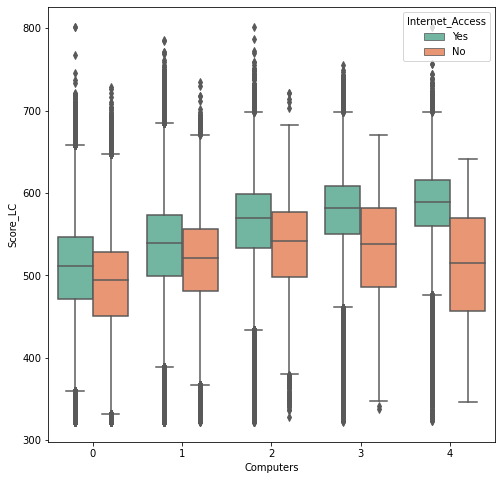

In [52]:
dataset_ic_LC = dataset.filter(items=['Internet_Access', 'Computers', 'Score_LC'])
                                  
dataset_ic_LC = dataset_ic_LC.loc[(dataset_ic_LC != 0).all(axis=1), :]

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_ic_LC = sns.boxplot(x = 'Computers', y = 'Score_LC', hue = 'Internet_Access',
                             palette = 'Set2', ax = ax, data = dataset_ic_LC,
                            order = ['0', '1', '2', '3', '4'])

### 6.2.28 Score by Internet Access and Computers (Math)

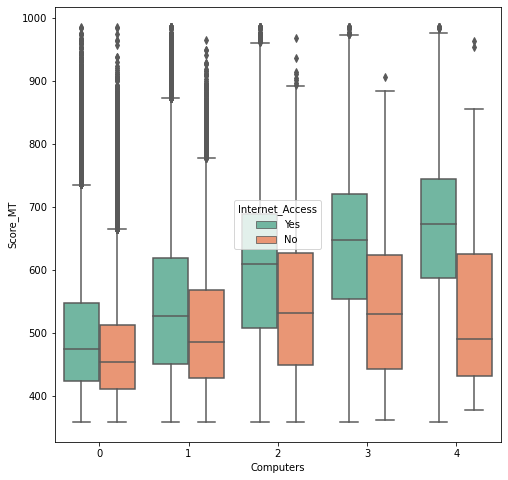

In [53]:
dataset_ic_MT = dataset.filter(items=['Internet_Access', 'Computers', 'Score_MT'])
                                  
dataset_ic_MT = dataset_ic_MT.loc[(dataset_ic_MT != 0).all(axis=1), :]

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_ic_MT = sns.boxplot(x = 'Computers', y = 'Score_MT', hue = 'Internet_Access',
                             palette = 'Set2', ax = ax, data = dataset_ic_MT,
                            order = ['0', '1', '2', '3', '4'])

### 6.2.29 Score by Internet Access and Computers (Essay)

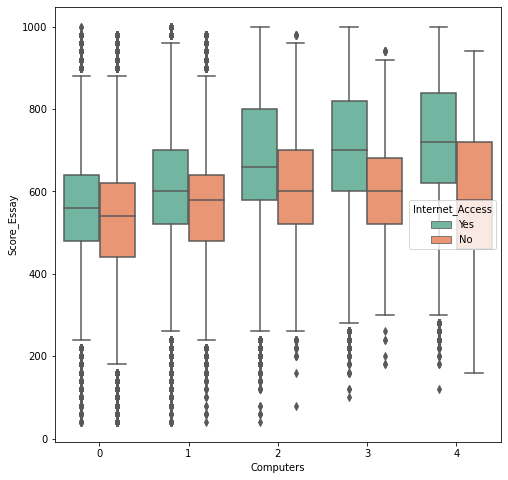

In [54]:
dataset_ic_ES = dataset.filter(items=['Internet_Access', 'Computers', 'Score_Essay'])
                                  
dataset_ic_ES = dataset_ic_ES.loc[(dataset_ic_ES != 0).all(axis=1), :]

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_ic_ES = sns.boxplot(x = 'Computers', y = 'Score_Essay', hue = 'Internet_Access',
                             palette = 'Set2', ax = ax, data = dataset_ic_ES,
                            order = ['0', '1', '2', '3', '4'])

### 6.2.30 Number of Right Answers by Internet Access and Computers

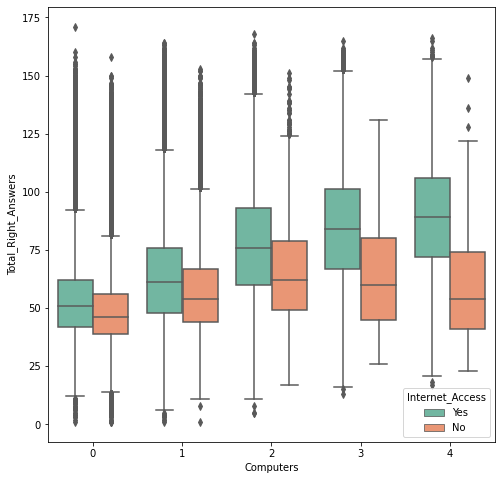

In [55]:
dataset_ic_RA = dataset.filter(items=['Internet_Access', 'Computers', 'Total_Right_Answers'])
                                  
dataset_ic_RA = dataset_ic_RA.loc[(dataset_ic_RA != 0).all(axis=1), :]

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)

score_by_ic_RA = sns.boxplot(x = 'Computers', y = 'Total_Right_Answers', hue = 'Internet_Access',
                             palette = 'Set2', ax = ax, data = dataset_ic_RA,
                            order = ['0', '1', '2', '3', '4'])